##Tugas Neural Networks - 2
###Anggota:
1. Nicole Orleans Arviani (205091000111011)
2. Muhammad Wildan Maulana (205091001111011)
3. Amanda Nadhifa Maydika (205091000111001)
4. Rifdah Desti Salsabila (205091000111028)

Colab: https://colab.research.google.com/drive/12tASX2dHrsQVCcuDggPXHu6N5f15xw8S?usp=sharing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import h5py
import requests
import os
import math, time
import itertools
import datetime

from pandas import datetime
from sklearn import preprocessing
from operator import itemgetter
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from tensorflow.python.keras.layers.recurrent import LSTM
from keras.models import load_model

%matplotlib inline
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  if sys.path[0] == '':


##Input file csv

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/mlanaAlana/UasAnalitikaData/main/ANTM.csv', delimiter=',')
df

,date,previous,open_price,first_trade,high,low,close,change,volume,value,...,bid_volume,listed_shares,tradeble_shares,weight_for_index,foreign_sell,foreign_buy,delisting_date,non_regular_volume,non_regular_value,non_regular_frequency
0,2019-07-29T00:00:00,890.0,895.0,895.0,915.0,880.0,895.0,5.0,63726900.0,5.732074e+10,...,2407000.0,2.403076e+10,2.403076e+10,2.403076e+10,794500.0,7628600.0,NaN,13737100.0,9.801583e+09,4.0
1,2019-07-30T00:00:00,895.0,905.0,905.0,940.0,905.0,935.0,40.0,84114000.0,7.805867e+10,...,490200.0,2.403076e+10,2.403076e+10,2.403076e+10,2683700.0,2203900.0,NaN,460000.0,4.258000e+08,2.0
2,2019-07-31T00:00:00,935.0,940.0,945.0,945.0,925.0,935.0,0.0,48705800.0,4.564934e+10,...,1387300.0,2.403076e+10,2.403076e+10,2.403076e+10,6255200.0,854000.0,NaN,53260233.0,3.992344e+10,9.0
3,2019-08-01T00:00:00,935.0,935.0,935.0,940.0,920.0,925.0,-10.0,46309500.0,4.302740e+10,...,2105800.0,2.403076e+10,2.403076e+10,2.403076e+10,5147700.0,350000.0,NaN,28255636.0,2.519354e+10,24.0
4,2019-08-02T00:00:00,925.0,905.0,905.0,920.0,890.0,900.0,-25.0,100773500.0,9.095440e+10,...,819700.0,2.403076e+10,2.403076e+10,2.403076e+10,18544300.0,4642000.0,NaN,17973343.0,1.637872e+10,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,2021-07-05T00:00:00,2220.0,2230.0,2230.0,2260.0,2220.0,2240.0,20.0,60698700.0,1.358437e+11,...,848000.0,2.403076e+10,2.403076e+10,2.403076e+10,8811200.0,16623500.0,NaN,0.0,0.000000e+00,0.0
475,2021-07-06T00:00:00,2240.0,2250.0,2250.0,2510.0,2240.0,2480.0,240.0,365880400.0,8.852093e+11,...,948300.0,2.403076e+10,2.403076e+10,2.403076e+10,25695600.0,79792100.0,NaN,3069922.0,7.635326e+09,9.0
476,2021-07-07T00:00:00,2480.0,2450.0,2440.0,2470.0,2380.0,2460.0,-20.0,146473200.0,3.555388e+11,...,411300.0,2.403076e+10,2.403076e+10,2.403076e+10,28584000.0,22873900.0,NaN,2478965.0,6.011374e+09,5.0
477,2021-07-08T00:00:00,2460.0,2460.0,2470.0,2610.0,2460.0,2550.0,90.0,227835500.0,5.846335e+11,...,1350200.0,2.403076e+10,2.403076e+10,2.403076e+10,22305700.0,32943700.0,NaN,100160.0,2.474130e+08,5.0


##Pre-processing

In [ ]:
col = ['date','open_price','high','low','volume','close']
data=df[col]
data

,date,open_price,high,low,volume,close
0,2019-07-29T00:00:00,895.0,915.0,880.0,63726900.0,895.0
1,2019-07-30T00:00:00,905.0,940.0,905.0,84114000.0,935.0
2,2019-07-31T00:00:00,940.0,945.0,925.0,48705800.0,935.0
3,2019-08-01T00:00:00,935.0,940.0,920.0,46309500.0,925.0
4,2019-08-02T00:00:00,905.0,920.0,890.0,100773500.0,900.0
...,...,...,...,...,...,...
474,2021-07-05T00:00:00,2230.0,2260.0,2220.0,60698700.0,2240.0
475,2021-07-06T00:00:00,2250.0,2510.0,2240.0,365880400.0,2480.0
476,2021-07-07T00:00:00,2450.0,2470.0,2380.0,146473200.0,2460.0
477,2021-07-08T00:00:00,2460.0,2610.0,2460.0,227835500.0,2550.0


In [ ]:
data.shape

(479, 6)

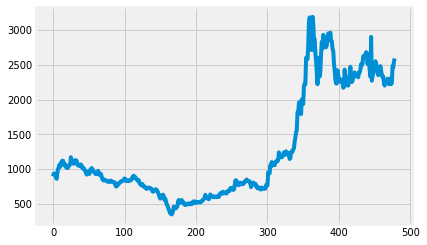

In [ ]:

plt.plot(data['close'])
plt.show()

In [ ]:
data = data.filter(['close'])
dataset = data.values

training_data_len = math.ceil(len(dataset)* .8)
training_data_len

384

In [ ]:
#Normalisasi
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.19247009],
       [0.20654469],
       [0.20654469],
       [0.20302604],
       [0.19422942],
       [0.18015482],
       [0.20830401],
       [0.23117523],
       [0.2364532 ],
       [0.25228712],
       [0.24173118],
       [0.25228712],
       [0.26812104],
       [0.27163969],
       [0.27163969],
       [0.25932442],
       [0.24700915],
       [0.25404645],
       [0.2434905 ],
       [0.23469388],
       [0.23997185],
       [0.2364532 ],
       [0.24700915],
       [0.24876847],
       [0.25404645],
       [0.28923293],
       [0.26812104],
       [0.26460239],
       [0.26460239],
       [0.25580577],
       [0.27163969],
       [0.27515834],
       [0.27339901],
       [0.27163969],
       [0.25404645],
       [0.24700915],
       [0.24700915],
       [0.25228712],
       [0.24524982],
       [0.25228712],
       [0.24876847],
       [0.23469388],
       [0.23293455],
       [0.23469388],
       [0.22589726],
       [0.22061928],
       [0.21358198],
       [0.201

##Spliting Data

In [ ]:
train_data = scaled_data[0:training_data_len , :]
x_train = []
y_train = []

for j in range(15, len(train_data)):
    x_train.append(train_data[j-15:j,0])
    y_train.append(train_data[j,0])
    if j<=15:
        print(x_train)
        print(y_train)
        print()

[array([0.19247009, 0.20654469, 0.20654469, 0.20302604, 0.19422942,
       0.18015482, 0.20830401, 0.23117523, 0.2364532 , 0.25228712,
       0.24173118, 0.25228712, 0.26812104, 0.27163969, 0.27163969])]
[0.2593244194229416]



In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(369, 15, 1)

##Pembuatan Model LSTM

In [ ]:
model = Sequential()
model.add(LSTM(20, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(20, return_sequences=False))
model.add(Dense(10))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size=1, epochs=20)

Epoch 1/20
369/369 [==============================] - 15s 26ms/step - loss: 0.0113
Epoch 2/20
369/369 [==============================] - 10s 27ms/step - loss: 0.0036
Epoch 3/20
369/369 [==============================] - 7s 19ms/step - loss: 0.0031
Epoch 4/20
369/369 [==============================] - 5s 14ms/step - loss: 0.0030
Epoch 5/20
369/369 [==============================] - 5s 14ms/step - loss: 0.0027
Epoch 6/20
369/369 [==============================] - 5s 14ms/step - loss: 0.0024
Epoch 7/20
369/369 [==============================] - 5s 14ms/step - loss: 0.0022
Epoch 8/20
369/369 [==============================] - 5s 13ms/step - loss: 0.0017
Epoch 9/20
369/369 [==============================] - 5s 13ms/step - loss: 0.0014
Epoch 10/20
369/369 [==============================] - 5s 13ms/step - loss: 0.0014
Epoch 11/20
369/369 [==============================] - 5s 14ms/step - loss: 0.0013
Epoch 12/20
369/369 [==============================] - 5s 14ms/step - loss: 0.0014
Epoch 13/20

In [ ]:
test_data = scaled_data[training_data_len - 15: , :]
x_test = []
y_test = dataset[training_data_len:, :]

for j in range(15, len(test_data)):
    x_test.append(test_data[j-15:j, 0])

In [ ]:
x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

##Evaluasi

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


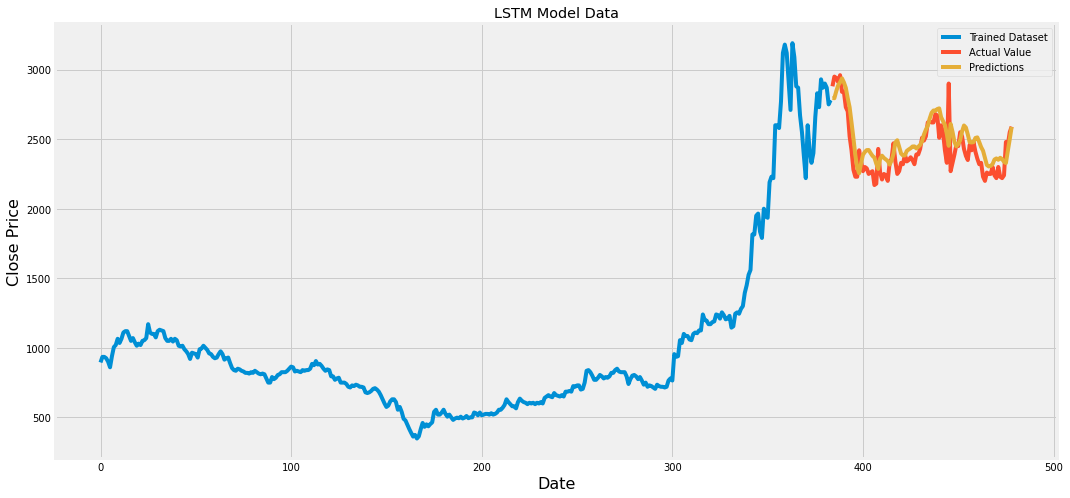

In [ ]:
train = data[:training_data_len]
val = data[training_data_len:]
val['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('LSTM Model Data')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Close Price', fontsize=16)
plt.plot(train['close'])
plt.plot(val[['close', 'Predictions']])
plt.legend(['Trained Dataset', 'Actual Value', 'Predictions'])
plt.show()

In [ ]:
val


,close,Predictions
384,2880.0,2796.165039
385,2950.0,2794.512207
386,2940.0,2844.972168
387,2910.0,2887.262695
388,2960.0,2908.650635
...,...,...
474,2240.0,2337.303467
475,2480.0,2328.198730
476,2460.0,2415.850586
477,2550.0,2499.224121


In [ ]:
rmse = np.sqrt( np.mean( predictions - y_test)**2)
print(f'RMSE:{rmse}')

RMSE:71.16848530016448


##Mengubah colab menjadi pdf

In [ ]:
nama_file_ipynb = 'Tugas_Neural_Network-2.ipynb'

In [ ]:
!apt update
!apt install texlive-xetex texlive-fonts-recommended texlive-generic-recommended

from google.colab import drive
drive.mount('/content/gdrive')

import re, pathlib, shutil

nama_file_ipynb = nama_file_ipynb + '.ipynb' if '.ipynb' not in nama_file_ipynb else nama_file_ipynb

print(f"\nProcessing {nama_file_ipynb}\n")
fullpath = r"/content/gdrive/My Drive/Colab Notebooks/Tugas_Neural_Network-2.ipynb"

#Optionally copy your notebooks from gdrive to your vm
#shutil.copy(fullpath, nama_file_ipynb)
n = pathlib.Path(fullpath)

!jupyter nbconvert "{n.as_posix()}" --to pdf --output "{n.stem.replace(" ", "_")}"

Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:14 http://archive.ubuntu.co